Regra de propagação: $y = f_h [\sum_{i=1}^nw_ix_i - \theta]$

Algoritmo de aprendizagem:

Se um padrão é corretamente classificado:
* $W(t+1) = W(t)$, se $\sum w_ix_i - \theta\geq0$ e $x$ pertence a C1
* $W(t+1) = W(t)$, se $\sum w_ix_i - \theta\lt0$ e $x$ pertence a C2

Se um padrão é incorretamente classificado:
* $W(t+1) = W(t)-\eta x$, se $\sum w_ix_i - \theta\geq0$ e $x$ pertence a C1
* $W(t+1) = W(t)+\eta x$, se $\sum w_ix_i - \theta\lt0$ e $x$ pertence a C2

Usando $\theta=0.5$ e $\eta=0.4$

<!-- Dada uma rede do tipo Perceptron formada por um neurônio com três terminais de entrada, utilizando pesos iniciais $w_0=0.4$, $w_1=-0.6$ e $w_2=0.6$, limiar $\theta=0.5$ e taxa de aprendizado $\eta=0.4$, -->

In [1]:
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

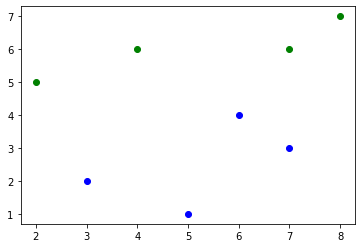

In [2]:
# Static Sample

group_1 = ([5, 6, 3, 7], [1, 4, 2, 3])
group_2 = ([2, 4, 7, 8], [5, 6, 6, 7])

plt.plot(*group_1, 'ro', color='blue')
plt.plot(*group_2, 'ro', color='green')

plt.show()

In [3]:
def evaluate_sample(x, y):
    '''
    returns 1 if sample belongs to group 1 and 0 if it belongs to group 2
    '''
    s1 = [(group_1[0][t], group_1[1][t]) for t in range(len(group_1[0]))]
    s2 = [(group_2[0][t], group_2[1][t]) for t in range(len(group_2[0]))]
    return 1 if ((x, y) in group_1) else -1

In [4]:
class Neuron(object):
    def __init__(self, cardinality = 2, theta = 0.5, eta = 0.4):
        self.__weights = [random.uniform(-1, 1) for x in range(cardinality)]
        self.theta = theta
        self.eta = eta
    
    def iterate(self, sample: list):
        '''
        Faz uma iteração do Neurônio
        '''
        if (len(sample) != len(self.__weights)):
            raise ValueError("A amostra deve ter a mesma quantidde de dimensões do vetor de pesos")
        w = self.__weights
        x = sample
        _sum = sum([x[t]*w[t] for t in range(len(x))]) - self.theta
        y = 1 if (_sum >=0) else -1
        if (not (evaluate_sample(*x) == y)):
            for i in range(len(w)):
                w[i] = w[i] - self.eta*x[i] if y == -1 else w[i] + self.eta*x[i]
        return w
    
    def predict(self, sample: list):
        w = self.__weights
        x = sample
        _sum = sum([x[t]*w[t] for t in range(len(x))]) - self.theta
        return 1 if (_sum >=0) else -1

In [5]:
n = Neuron()
counter = 0
threshold = 100
while (counter < threshold):
    counter += 1
    samples = (group_1[0] + group_2[0], group_1[1] + group_2[1])
    t = random.randint(0, len(samples)-1)
    sample = [samples[0][t], samples[1][t]]
    print(n.iterate(sample))

[3.379708448957451, 1.0418770127887813]
[5.379708448957452, 1.4418770127887814]
[7.779708448957452, 3.0418770127887815]
[9.779708448957452, 3.4418770127887814]
[11.779708448957452, 3.8418770127887814]
[13.779708448957452, 4.241877012788781]
[16.179708448957452, 5.841877012788782]
[18.579708448957454, 7.441877012788781]
[20.979708448957453, 9.041877012788781]
[22.979708448957453, 9.441877012788781]
[24.979708448957453, 9.841877012788782]
[26.979708448957453, 10.241877012788782]
[29.37970844895745, 11.841877012788782]
[31.77970844895745, 13.441877012788781]
[33.77970844895745, 13.841877012788782]
[35.77970844895745, 14.241877012788782]
[38.17970844895745, 15.841877012788782]
[40.57970844895745, 17.441877012788783]
[42.57970844895745, 17.841877012788782]
[44.57970844895745, 18.24187701278878]
[46.979708448957446, 19.841877012788782]
[49.379708448957444, 21.441877012788783]
[51.77970844895744, 23.041877012788785]
[53.77970844895744, 23.441877012788783]
[56.17970844895744, 25.04187701278878

In [6]:
print(n.predict((3, 5)))

1
